In [448]:
import sklearn as skl
import numpy as np
from matplotlib import pyplot as plt
import keras as k
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, LeakyReLU,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras_tqdm import TQDMNotebookCallback
import random

In [451]:
random.random()

0.5252364375245923

In [471]:
x = np.linspace(-300,300,100)
#def fy(x):
#    if x < 300:
#        y = 10*np.sin(x/(8*(500/(500-x+100)))) - np.cos(x/30) + .0000099*x**3 - .001*x**2 - 0.000000023*x**4
#    else:
#        y = .02*x - .000045*x**2
#    
#    return y 

def fy(x):
        
    y = x**2 + x**2*(1-random.random())
    return y 


y = np.array([fy(i) for i in x])

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 0.9999999999999999


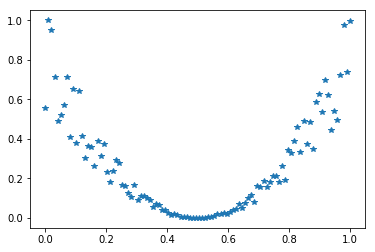

In [472]:
plt.plot(x,y,"*")
plt.show()

In [473]:
def make_neural_net(n_layers, nodes_per_layer):
    model = Sequential()
    initializer = 'glorot_normal'
    activation = LeakyReLU()
    droupout_rate = .1

    model.add(Dense(nodes_per_layer, input_dim=1, activation=activation, kernel_initializer=initializer))
    model.add(BatchNormalization())
              
    for i in range(n_layers-2):
        model.add(Dropout(droupout_rate))
        model.add(Dense(nodes_per_layer, activation=activation, kernel_initializer=initializer))
        model.add(BatchNormalization())
        
              
    model.add(Dense(1, activation=activation, kernel_initializer=initializer))

    model.compile(optimizer='adam', loss="mean_squared_error")
    
    return model


In [474]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(len(x_train))

50


In [487]:
model = make_neural_net(5,2000)

/home/dan/anaconda3/lib/python3.6/site-packages/keras/activations.py:89: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [488]:
#early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=40, verbose=0, mode='auto')
cbs = [reduce_lr, TQDMNotebookCallback(leave_outer=True)]


history = model.fit(x_train, y_train, epochs=1000, batch_size=5, verbose=0, validation_split=0.3, callbacks=cbs)


In [489]:
y_pred = model.predict(x)

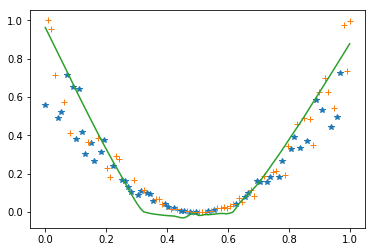

In [490]:
#plt.plot(x_train,y_train,"*", 'y')
plt.plot(x_test,y_test,"*")
plt.plot(x_train,y_train,"+")
plt.plot(x,y_pred,"-")
plt.show()

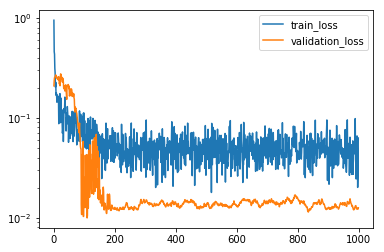

In [486]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.yscale('log')
plt.show()

In [338]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_get_available_gpus'